# Exploratory Data Analysis - Movie Recommendation System

This notebook provides a comprehensive exploratory data analysis of the finalized movie dataset, including statistical analysis, and visual insights.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import json
import ast
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")

## 2. Load Data

In [2]:
df = pd.read_csv('../data/final/sample.csv')
# Convert string representation of lists to actual lists for genres
def parse_genres(x):
    if isinstance(x, str):
        try:
            # Try JSON parsing first
            return json.loads(x)
        except json.JSONDecodeError:
            # Fallback: strip brackets and split by comma
            return [i.strip().strip("'\"") for i in x.strip("[]").split(",")]
    return x

df['genres'] = df['genres'].apply(parse_genres)
print(df.head())

   movieId                            title   imdbId    tmdbId  \
0   169336  Michael Ian Black: Noted Expert  5200506  399938.0   
1    98381          Hellraiser: Revelations  1716747   70584.0   
2   113862                       Guest, The  2980592  241848.0   
3    78774                     Solitary Man  1294213   36691.0   
4   152280                             Lolo  4085944  341392.0   

                                      positive_users  \
0                                            [63994]   
1            [44970, 106905, 108905, 172263, 216119]   
2  [305, 2158, 2172, 2402, 3083, 3553, 3786, 3884...   
3  [9374, 11377, 26308, 31976, 32936, 39356, 4197...   
4                    [26162, 166377, 175659, 271906]   

                                      negative_users  positive_count  \
0                                                 []               1   
1  [3083, 11969, 21507, 22009, 45584, 64906, 6565...               5   
2  [95, 527, 3892, 5616, 6386, 8219, 9082, 21730,.

## 3. Data Analysis

### 3.1. Initial Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13702 entries, 0 to 13701
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movieId               13702 non-null  int64  
 1   title                 13702 non-null  object 
 2   imdbId                13702 non-null  int64  
 3   tmdbId                13702 non-null  float64
 4   positive_users        13702 non-null  object 
 5   negative_users        13702 non-null  object 
 6   positive_count        13702 non-null  int64  
 7   negative_count        13702 non-null  int64  
 8   id                    13702 non-null  int64  
 9   vote_average          13702 non-null  float64
 10  vote_count            13702 non-null  int64  
 11  status                13702 non-null  object 
 12  release_date          13702 non-null  object 
 13  revenue               13702 non-null  int64  
 14  runtime               13702 non-null  int64  
 15  adult              

In [4]:
df.describe()

,movieId,imdbId,tmdbId,positive_count,negative_count,id,vote_average,vote_count,revenue,runtime,budget,tmdb_id
count,13702.000000,1.370200e+04,1.370200e+04,13702.000000,13702.000000,1.370200e+04,13702.000000,13702.000000,1.370200e+04,13702.000000,1.370200e+04,1.370200e+04
mean,180036.556342,5.345436e+06,3.705143e+05,164.758283,60.666764,3.705143e+05,6.444666,636.801562,2.388603e+07,98.335061,8.181827e+06,3.705143e+05
std,58595.321725,4.289856e+06,2.452090e+05,1059.341748,232.786571,2.452090e+05,1.096005,1929.461750,1.104920e+08,29.055224,2.710214e+07,2.452090e+05
min,53519.000000,1.000085e+06,1.731000e+03,0.000000,0.000000,1.731000e+03,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,1.731000e+03
25%,135588.000000,1.961176e+06,1.569898e+05,1.000000,1.000000,1.569898e+05,5.800000,19.000000,0.000000e+00,87.000000,0.000000e+00,1.569898e+05
50%,181414.000000,4.052466e+06,3.632075e+05,4.000000,4.000000,3.632075e+05,6.681000,69.000000,0.000000e+00,97.000000,0.000000e+00,3.632075e+05
75%,219829.500000,7.316324e+06,5.228785e+05,24.000000,20.000000,5.228785e+05,7.167000,323.000000,1.327204e+06,112.000000,2.500000e+06,5.228785e+05
max,288967.000000,2.798907e+07,1.147612e+06,50108.000000,5311.000000,1.147612e+06,10.000000,34495.000000,2.800000e+09,497.000000,4.600000e+08,1.147612e+06


### 3.2. Missing Values Analysis

In [5]:
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
pd.concat([missing_values, missing_percent], axis=1, keys=['Missing Count', 'Percent'])

,Missing Count,Percent
movieId,0,0.0
title,0,0.0
imdbId,0,0.0
tmdbId,0,0.0
positive_users,0,0.0
negative_users,0,0.0
positive_count,0,0.0
negative_count,0,0.0
id,0,0.0
vote_average,0,0.0


### 3.3. Statistical Analysis of Numerical Columns

In [6]:
numerical_cols = ['vote_average', 'vote_count', 'revenue', 'runtime', 'budget']
df[numerical_cols].agg(['mean', 'median', 'std', 'min', 'max'])

,vote_average,vote_count,revenue,runtime,budget
mean,6.444666,636.801562,2.388603e+07,98.335061,8.181827e+06
median,6.681000,69.000000,0.000000e+00,97.000000,0.000000e+00
std,1.096005,1929.461750,1.104920e+08,29.055224,2.710214e+07
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
max,10.000000,34495.000000,2.800000e+09,497.000000,4.600000e+08


## 4. Visualizations

### 4.1. Vote Average Distribution

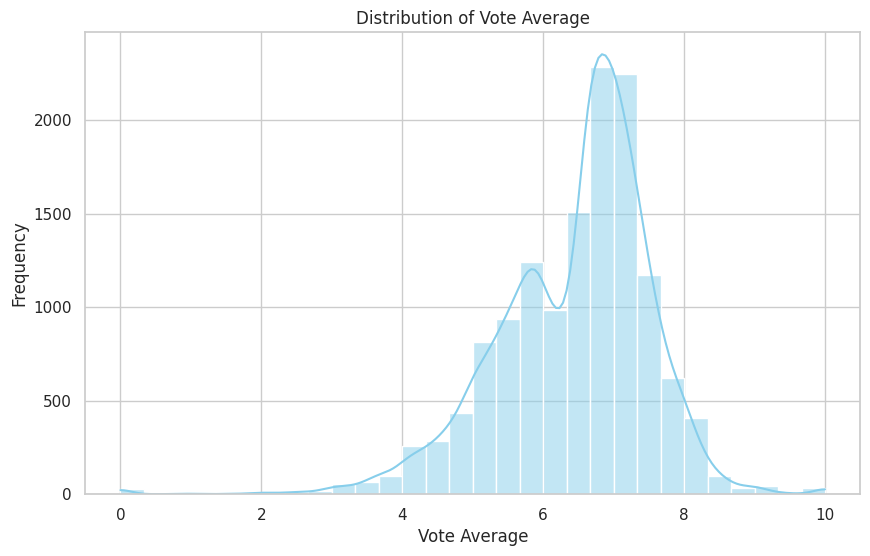

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['vote_average'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

### 4.2. Top 10 Movie Genres

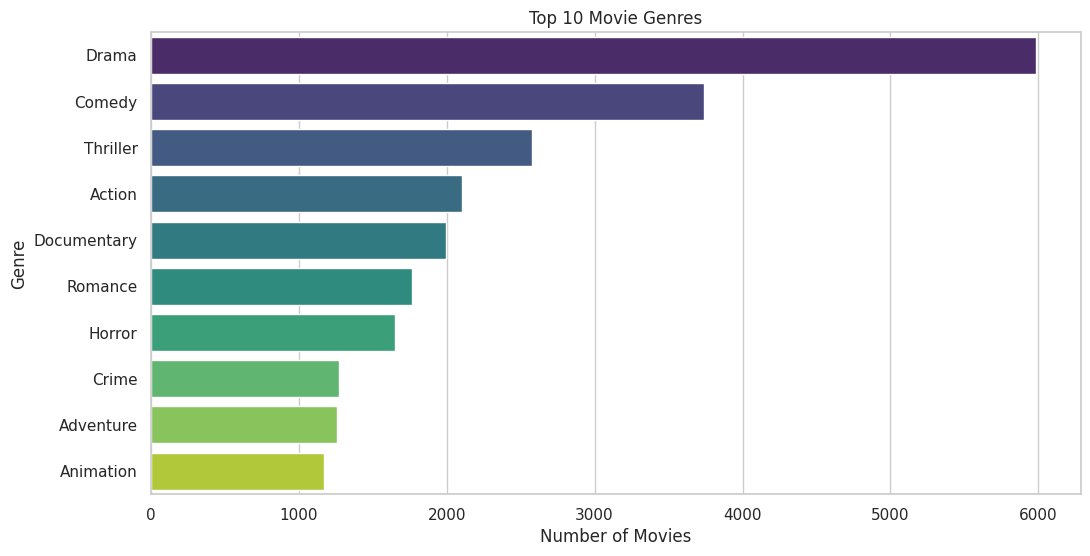

In [8]:
all_genres = [genre for sublist in df['genres'].dropna() for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

### 4.3. Correlation Heatmap

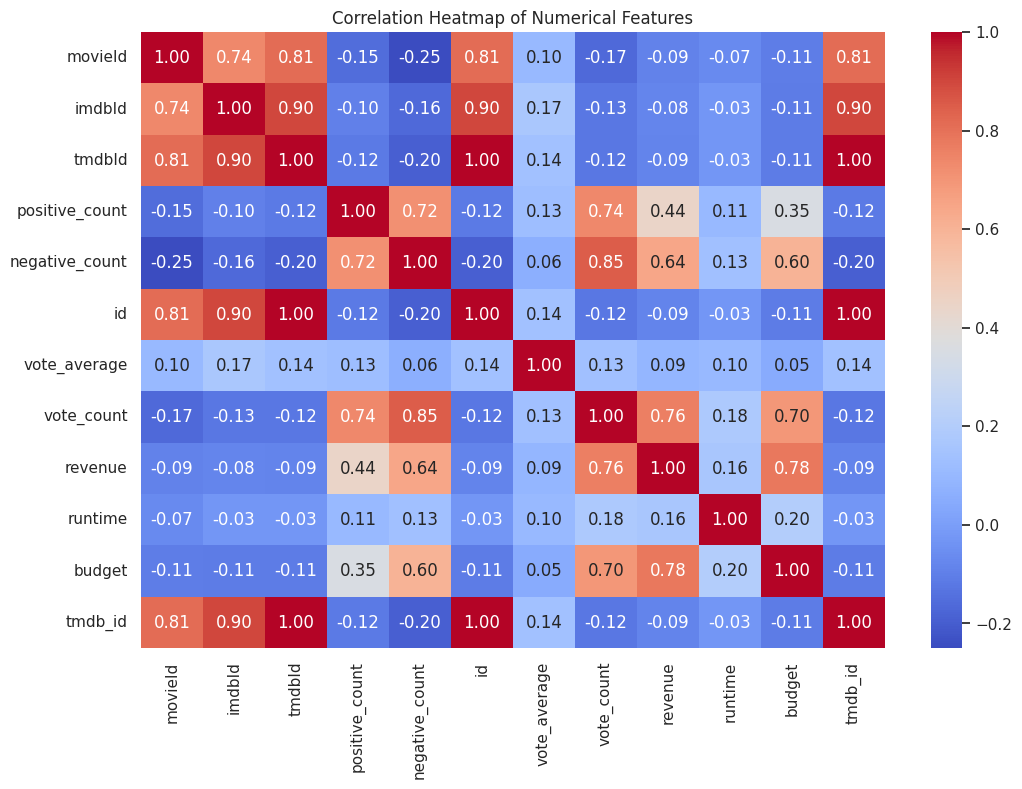

In [9]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()